<a href="https://colab.research.google.com/github/wanderson42/Portfolio-DS/blob/main/Project12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Science**

# **Projeto de Portfólio:**

<span style='color:Gray'> Implementação do algoritmo LDA e t-SNE para redução de dimensionalidade  </span>

Autor: Wanderson Ferreira
***

Neste notebook, foi implementado um algoritmo LDA com métodos similares ao Scikit-learn, e juntamente com t-sne, através de uma abordagem híbrida, ambos foram aplicados no conjunto de dados *Fashion-MNIST*, com intuíto de reduzir a dimensionalidade dos dados, preservando as informações relevantes e melhorando a visualização e separação das classes.

<br>

# **1 - Background teórico**

### **1.1 - Linear Discriminant Analysis (LDA)**

O LDA (Linear Discriminant Analysis) é um algoritmo de aprendizado de máquina supervisionado que é comumente usado para análise de dados e classificação de padrões. Ele é usado principalmente para redução de dimensionalidade e seleção de features, ao mesmo tempo em que preserva a informação relevante para a classificação.

</div>
<left><img src="https://lh6.googleusercontent.com/ar5TGG5URcdr3EWHMPDIzovIZp_v0KzrXHraV06tMQEHBCdyrncGshMkTD438QRNmnesmunAvuzzp1xvTEjhqLkm9XR-wIOviiOpqsplTirUZBmx9Ymm1SOuM60K1-mszWaOpvIy" width="800"/> <left>
</div>

<p><center></center></p>

A separação das classes é realizada através da maximização da razão das variâncias entre as classes e dentro das classes, que é representada pela equação abaixo:

$$ J(w) = \frac{w^{T}S_B w}{w^{T}S_w w} $$

Onde $S_B$ é a matriz de dispersão entre classes e $S_W$ é a matriz de dispersão dentro das classes. A matriz $S_B$ mede a variância entre as médias das classes, enquanto a matriz $S_W$ mede a variância dentro de cada classe. O objetivo do LDA é encontrar o vetor $w$ que maximiza a razão $J(w)$.

A equação para calcular os coeficientes de projeção é dada por:

$$ w = S^{-1}_W (\mu_{1} - \mu_{2}) $$

Onde $\mu_1$ e $\mu_2$ são as médias dos dados projetados nas duas classes.


<br>

### **1.2 - t-Distributed Stochastic Neighbor Embedding (t-SNE)**

O t-SNE (t-distributed Stochastic Neighbor Embedding) é uma técnica de redução de dimensionalidade não supervisionada que mapeia dados de alta dimensão em um espaço de baixa dimensão (tipicamente 2D ou 3D), preservando a estrutura local e globais da similaridade entre os dados, tornando mais fácil identificar agrupamentos e padrões não óbvios.


</div>
<left><img src="https://miro.medium.com/v2/resize:fit:1200/1*aUZyqZ9i7vKjNvpG3mhH3A.png" width="800"/> <left>
</div>

<p><center></center></p>

A ilustração acima tem maior densidade na região ocupada pelos pontos preto e menor densidade na região ocupada pelos pontos amarelos.


O t-SNE utiliza uma abordagem baseada em probabilidades para modelar as relações entre os pontos. Em resumo, um tipico algoritmo t-SNE funciona da seguinte forma:

1. Calcula as probabilidades de similaridade entre todos os pares de pontos (baseado na distância entre eles) no espaço de alta dimensão.

2. Utiliza essas probabilidades para calcular as probabilidades de similaridade correspondentes no espaço de baixa dimensão.

3. Minimiza a divergência de Kullback-Leibler entre as distribuições de probabilidade de similaridade no espaço de alta dimensão e no espaço de baixa dimensão, ajustando as posições dos pontos no espaço de baixa dimensão.





***


<br>


# **2 - Implementação**

### **2.1 - Linear Discriminant Analysis (LDA)**

- A classe customizada `TuringLDA` foi escrita tendo-se em mente a sintaxe da API do Scikit-learn.

- Método `__init__(self, n_components=None)`:
   - Este é o método de inicialização da classe, Ele inicializa as variáveis `n_components`, `means`, `covariance_within`, `covariance_between` e `projection_vectors`, onde `n_components` é o número de componentes que serão mantidos após a redução de dimensionalidade e os outros são variáveis que serão usadas para armazenar as informações obtidas durante o processo de treinamento.
   
- Método `fit(self, X, y)`:
   - Esse método é usado para treinar o modelo. Ele recebe uma matriz `X` de dimensão `(n_samples, n_features)` e um vetor `y` de dimensão `n_samples,)` que contém as classes associadas a cada amostra em `X`.
   
O método começa calculando a média de cada classe em X e armazenando esses vetores na variável `means`. Em seguida, ele calcula as matrizes de covariância intra-classe e inter-classe usando a fórmula do LDA.

Depois disso, ele calcula os autovalores e autovetores da matriz resultante da multiplicação das matrizes de covariância intra-classe e inter-classe. A partir desses autovetores, ele seleciona os `n_components` que correspondem aos maiores autovalores e armazena esses autovetores na variável `projection_vectors`.
   
- Método `transform(self, X)`:
   - Esse método é usado para reduzir a dimensionalidade dos dados. Ele recebe uma matriz `X` de dimensão `(n_samples, n_features)` e projeta esses dados na direção dos autovetores armazenados em `projection_vectors`.

- Método `fit_transform(self, X, y)`:
   - Esse método é uma combinação dos métodos `fit` e `transform`. Ele treina o modelo com os dados `X` e `y` e em seguida retorna a matriz de dados projetada na direção dos autovetores selecionados.

Esses são os principais métodos implementados nesta classe enxuta do LDA, que possui funcionalidades similares aos métodos do Scikit-learn, mas é importante notar que esta implementação pode não ser otimizada em termos de desempenho e pode não incluir todos os recursos avançados presentes na biblioteca do Scikit-learn.

<br>

<br>

In [ ]:
import numpy as np

class TuringLDA:

    def __init__(self, n_components=None):
        self.n_components = n_components
        self.means = None
        self.covariance_within = None
        self.covariance_between = None
        self.projection_vectors = None

    def fit(self, X, y):
        classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(classes)

        # Calcula os vetores médios de cada classe
        self.means = np.array([np.mean(X[y==label], axis=0) for label in classes])

        # Calcula as matrizes de covariância dentro e entre classes
        self.covariance_within = np.zeros((n_features, n_features))
        self.covariance_between = np.zeros((n_features, n_features))

        for i, label in enumerate(classes):
            X_class = X[y == label]
            mean_class = self.means[i]
            self.covariance_within += np.cov(X_class.T)
            self.covariance_between += len(X_class) * (mean_class - np.mean(X, axis=0)).reshape(-1, 1) @ (mean_class - np.mean(X, axis=0)).reshape(1, -1)

        # Calcula os vetores de projeção que maximizam a separação entre classes
        eigvals, eigvecs = np.linalg.eig(np.linalg.inv(self.covariance_within) @ self.covariance_between)
        idx = np.argsort(eigvals)[::-1][:self.n_components]
        self.projection_vectors = eigvecs[:, idx]

    def transform(self, X):
        return np.real(X @ self.projection_vectors)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

<br>

#3 - Aplicação do algoritmo TuringLDA



### **3.1 - Compreendendo os dados**

Antes de prosseguir e carregar os dados, é bom entender e examinar os dados com os quais você estará trabalhando!

#### **3.1.1  Fashion-MNIST Dataset**
</div>
<left><img src="https://static.observableusercontent.com/files/99783ef5e2d8670f89eaf1b8f3ae703e04d8ead78572ac1b12590d3d3c0eb8585d3f30bf406150b337545019aa22deb3070f323d0b987e95eca7c6a8a5de2d88" width="800"/>
</div>


Um conjunto de dados semelhante ao MNIST, mas com imagens de roupas e acessórios em vez de dígitos escritos à mão. O conjunto de dados Fashion MNIST contém 70.000 imagens em tons de cinza de 10 categorias. As imagens mostram peças de vestuário individuais em baixa resolução (28 por 28 píxeis).

### **3.2 - Exploração dos dados**

Agora irei carregar e explorar rapidamente o Fashion-MNIST, com intuito de ter uma melhor ideia sobre a dimensionalidade do conjunto de dados.

#### **3.2.1  Fashion-MNIST Dataset**

Para importar o Fashion-MNIST no Google Colab, podemos usar a biblioteca keras do Python, que já possui o conjunto de dados pré-carregado.
Para carregar o conjunto de dados, você pode utilizar o seguinte código:

In [ ]:
from sklearn.datasets import fetch_openml

# Carrega o dataset Fashion-MNIST do OpenML
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1, cache=True)

# Redimensiona as imagens para a forma (28, 28, 1)
images = np.array(fashion_mnist.data).reshape(-1, 28, 28, 1)

# Normaliza as imagens
images = images / 255.0

# Converte os rótulos para o tipo inteiro
labels = np.array(fashion_mnist.target, dtype=np.int)

Vamos descobrir o número total de classes e tipos de dados que nelas possuem:

In [ ]:
# Find the unique numbers from train label dataset
classes = np.unique(labels)
nClasses = len(classes)
print('Numéro total de classes: ', nClasses)
print('Tipo de classes : ', classes)

Numéro total de classes:  10
Tipo de classes :  [0 1 2 3 4 5 6 7 8 9]


Agora, vamos plotar algumas imagens do Fashion-MNIST:

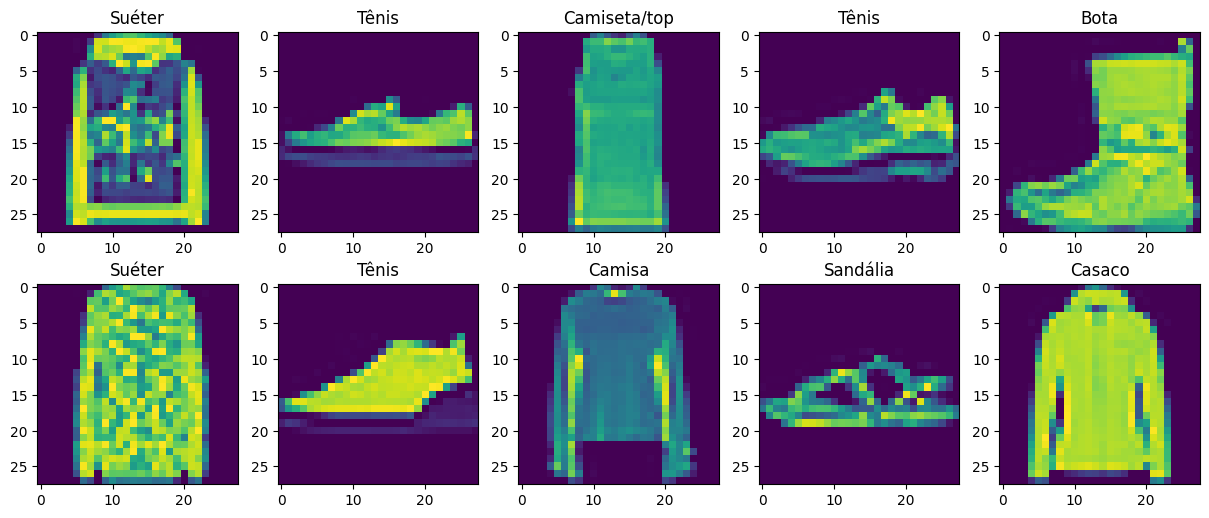

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dicionário de rótulos
label_dict = {
    0: 'Camiseta/top',
    1: 'Calça',
    2: 'Suéter',
    3: 'Vestido',
    4: 'Casaco',
    5: 'Sandália',
    6: 'Camisa',
    7: 'Tênis',
    8: 'Bolsa',
    9: 'Bota',
}

# Seleciona 10 imagens aleatórias
np.random.seed(42)
indices = np.random.choice(images.shape[0], size=10, replace=False)

# Plota as imagens selecionadas
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axs = axs.flatten()
for i, index in enumerate(indices):
    img = images[index].reshape(28, 28)
    label = label_dict[labels[index]]
    axs[i].imshow(img)
    axs[i].set_title(label)
plt.show()



### **3.3 - Visualização de dados usando o LDA (by Sklearn) e a classe t-SNE**

#### **3.3.1 - Fashion-MNIST Dataset**
Agora vem a parte mais interessante deste tutorial. A seguir, irei utilizar o LDA (by Sklearn) seguido da classe t-SNE para reduzir a dimensão dos dados para um espaço 2D.


In [ ]:
import pandas as pd
# Converte os dados em um DataFrame do Pandas
df = pd.DataFrame(fashion_mnist.data, columns=fashion_mnist.feature_names)
df['target'] = fashion_mnist.target
df

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...     114.0     130.0      76.0       0.0       0.0   
2         22.0  ...       0.0       1.0       0.0       0.0       0.0   
3         96.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996     31.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  target  
0           0.0       0.0       0.0       0.0       9  
1           0.0       0.0       0.0       0.0       0  
2           0.0       0.0       0.0       0.0       0  
3           0.0       0.0       0.0       0.0       3  
4           0.0       0.0       0.0       0.0       0  
...         ...       ...       ...       ...     ...  
69995       0.0       0.0       0.0       0.0       9  
69996       0.0       0.0       0.0       0.0       1  
69997       0.0       0.0       0.0       0.0       8  
69998       0.0       0.0       0.0       0.0       1  
69999       0.0       0.0       0.0       0.0       5  

[70000 rows x 785 columns]

Antes de alimentar os dados na rede neural, é necessário preparar os dados adequadamente. Em particular, as imagens precisam ser redimensionadas para melhorar o desempenho do modelo. Como já padronizamos os dados além de termos aplicado a redução de dimensionalidade, isso é um ponto positivo para reduzir o tempo de treinamento do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
# Separa os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Aplica LDA com 9 componentes no conjunto de treinamento
lda = TuringLDA(n_components=9)
X_train_lda = lda.fit_transform(X_train.reshape(-1, 784), y_train)

from sklearn.manifold import TSNE
# Aplica o t-SNE para reduzir ainda mais a dimensão dos dados
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_lda)

In [ ]:
# Aplica o t-SNE diretamente nos dados originais (Sem LDA)
tsne_orig = TSNE(n_components=2)
X_train_tsne_orig = tsne_orig.fit_transform(X_train.reshape(-1, 784))

Podemos utilizar a biblioteca Plotly para gerar os gráficos de dispersão.

Código:

In [ ]:
#@title
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = "colab"

def Plot_tSNE_orig_data():
  # Plota as imagens no espaço 2D utilizando o Plotly
  fig = go.Figure()

  for label in np.unique(y_train):
      mask = y_train == label
      trace = go.Scatter(
          x=X_train_tsne_orig[mask, 0],
          y=X_train_tsne_orig[mask, 1],
          mode='markers',
          name=label_dict[label],
          marker=dict(
              size=8,
              opacity=0.8,
              colorscale='Viridis',
              showscale=False
          )
      )
      fig.add_trace(trace)

  fig.update_layout(
      title='Projeção t-SNE no conjunto de dados Fashion-MNIST (Sem LDA)',
      xaxis_title='t-SNE 1',
      yaxis_title='t-SNE 2',
      hovermode='closest',
      width=800,
      height=700,
      xaxis=dict(title=dict(text='t-SNE Component 1', font=dict(size=16)), tickfont=dict(size=14)),
      yaxis=dict(title=dict(text='t-SNE Component 2', font=dict(size=16)), tickfont=dict(size=14)),
      legend=dict(font=dict(size=14))
  )

  return fig.show()

def Plot_tSNE():
  # Plota as imagens no espaço 2D utilizando o Plotly
  fig = go.Figure()

  for label in np.unique(y_train):
      mask = y_train == label
      trace = go.Scatter(
          x=X_train_tsne[mask, 0],
          y=X_train_tsne[mask, 1],
          mode='markers',
          name=label_dict[label],
          marker=dict(
              size=8,
              opacity=0.8,
              colorscale='Viridis',
              showscale=False
          )
      )
      fig.add_trace(trace)

  fig.update_layout(
      title='Projeção t-SNE no conjunto de dados Fashion-MNIST (Com LDA)',
      xaxis_title='t-SNE 1',
      yaxis_title='t-SNE 2',
      hovermode='closest',
      width=800,
      height=700,
      xaxis=dict(title=dict(text='t-SNE Component 1', font=dict(size=16)), tickfont=dict(size=14)),
      yaxis=dict(title=dict(text='t-SNE Component 2', font=dict(size=16)), tickfont=dict(size=14)),
      legend=dict(font=dict(size=14))
  )

  return fig.show()

In [ ]:
Plot_tSNE_orig_data()
Plot_tSNE()



 ### **3.4 - Implementação de uma rede neural para classificação de imagens**

#### **3.4.1 - Fashion-MNIST Dataset**


Primeiramente vamos importar a biblioteca Keras e em seguida construir uma rede neural convolucional. A rede neural convolucional é uma das arquiteturas de rede neural mais comuns usadas em tarefas de classificação de imagem. Conforme se segue:

In [ ]:
%%capture
!pip install tensorflow
!pip install keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Usa os dados transformados pelo LDA para treinar um modelo de rede neural
model = Sequential([
    Flatten(input_shape=(9,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Printando um resumo do modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________


Finalmente, é hora de compilar e treinar o modelo!

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lda, to_categorical(y_train), epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1400/1400 [==============================] - 6s 3ms/step - loss: 0.8148 - accuracy: 0.7960 - val_loss: 0.4931 - val_accuracy: 0.8339
Epoch 2/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4710 - accuracy: 0.8382 - val_loss: 0.4681 - val_accuracy: 0.8361
Epoch 3/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.4565 - accuracy: 0.8404 - val_loss: 0.4615 - val_accuracy: 0.8371
Epoch 4/10
1400/1400 [==============================] - 6s 5ms/step - loss: 0.4505 - accuracy: 0.8415 - val_loss: 0.4599 - val_accuracy: 0.8372
Epoch 5/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.4466 - accuracy: 0.8424 - val_loss: 0.4557 - val_accuracy: 0.8393
Epoch 6/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.4434 - accuracy: 0.8426 - val_loss: 0.4520 - val_accuracy: 0.8392
Epoch 7/10
1400/1400 [==============================] - 5s 3ms/step - loss: 0.4409 - accuracy: 0.8438 - val_loss: 0.4512 - val_accuracy:



Nos resultados acima, pode-se observar que o tempo necessário para treinar cada interação foi apenas cerca de 4 segundos na CPU do Google Colab. O modelo obteve uma boa precisão de treinamento e validação, com uma acurácia de cerca de 85% no conjunto de treinamento e 84% no conjunto de validação após 10 épocas de treinamento.

In [ ]:
# Aplica LDA aos dados de teste
X_test_lda = lda.transform(X_test.reshape(-1, 784))

# Avalia o modelo nos dados de teste
loss, accuracy = model.evaluate(X_test_lda, to_categorical(y_test))


438/438 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8335



Parece que o modelo apresentou um bom desempenho nos dados de teste, com uma acurácia de 83%.






# **Conclusão:**

Neste presente notebook, adotando o conjunto de dados fashion-mnist como estudo de caso, utilizei a técnica de redução de dimensionalidade LDA para extrair as componentes que melhor discriminam as classes, e em seguida apliquei a técnica de redução de dimensionalidade t-SNE, para visualizar os dados em um espaço de menor dimensão, onde a estrutura das classes pode ser melhor compreendida. Essa abordagem ajudou a melhor identificar subgrupos dentro das classes que não são facilmente separáveis pelos métodos puramente supervisionados ou não supervisionados. E em seguida treinei um modelo de rede neural para classificar o conjuntos de dados ao longo de 10 categorias e obtive uma acurácia muito boa, dada a complexidade do problema.